# SEP Distribution Tool

This tool downloads SEP intensity-time series data from various different spacecraft and visualizes the SEP distribution using Gaussian curves in one final results plot.

This tool uses a preset proton energy range to keep the various observations comparable.

There is an option to also show a spacecraft-constellation plot (Solar-MACH) and a table summarizing the spacecraft coordinates for the selected time interval.

In [6]:
# Import modules
import JTL_SEP_functions as jtl

#from seppy.util import jupyterhub_data_path
import datetime as dt
import numpy as np
import os
import pandas as pd

from solarmach import SolarMACH

/home/user/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Saving figures and date

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).

In [7]:
# Set your local path where you want to save the data files. 
# If run on the project's JupyterHub server, set it to a common data folder. 
data_path = f"{os.getcwd()}{os.sep}data"
#data_path = jupyterhub_data_path(data_path)

## Define the event details

Collect the event start and end dates (specifying the start at / near the observed flare onset time), and the eruption location (in Stonyhurst).

In [8]:
startdate = dt.datetime(2021,5,28,22,19)
enddate = "2021/05/31 23:00:00"

source_location = [67, 19] #longitude, latitude

In [16]:
# Options
event_options = {'04Jan2025': {'date': "2025/01/04 18:27:00",
                               'source': [60, -15]},
                 '17Dec2024': {'date': "2024/12/17 12:53:00",
                               'source': [33, -16]},
                 '08Dec2024': {'date': "2024/12/08 08:50:00",
                               'source': [52, -6]},
                 '03Oct2024': {'date': "2024/10/03 12:08:00",
                               'source': [8, -15]},
                 '01Sep2024': {'date': "2024/09/01 14:44:00",
                               'source': [66, -12]}}

## Show the fleet distribution
For more information on the Solar-MACH tool, see: reflinkhere

NB: If you wish to use BepiColombo data then it will need to downloaded separately and saved to the same folder.

In [12]:
# Hide all this
from sunpy.time import parse_time
datetime_parse = parse_time(startdate)

observers = ['Earth', 'PSP', 'Solar Orbiter', 'STEREO-A', 'BepiColombo']

sm1 = SolarMACH(datetime_parse, observers, vsw_list=[],
               reference_long=source_location[0], reference_lat=source_location[1],
               coord_sys='Stonyhurst')

No solar wind speeds defined, trying to obtain measurements...
Using 'ACE' measurements for 'Earth'.


Non compliant ISTP file: variable Vp has LABL_PTR_1 attribute which points to variable label_Vp which does not exist
Can't get data from proxy server http://sciqlop.lpp.polytechnique.fr/cache


No module named 'numpy._core'


Can't get data from proxy server http://sciqlop.lpp.polytechnique.fr/cache


No module named 'numpy._core'


Can't get data from proxy server http://sciqlop.lpp.polytechnique.fr/cache


No module named 'numpy._core'
Body 'BepiColombo' not supported, assuming default Vsw value of 400.0 km/s.


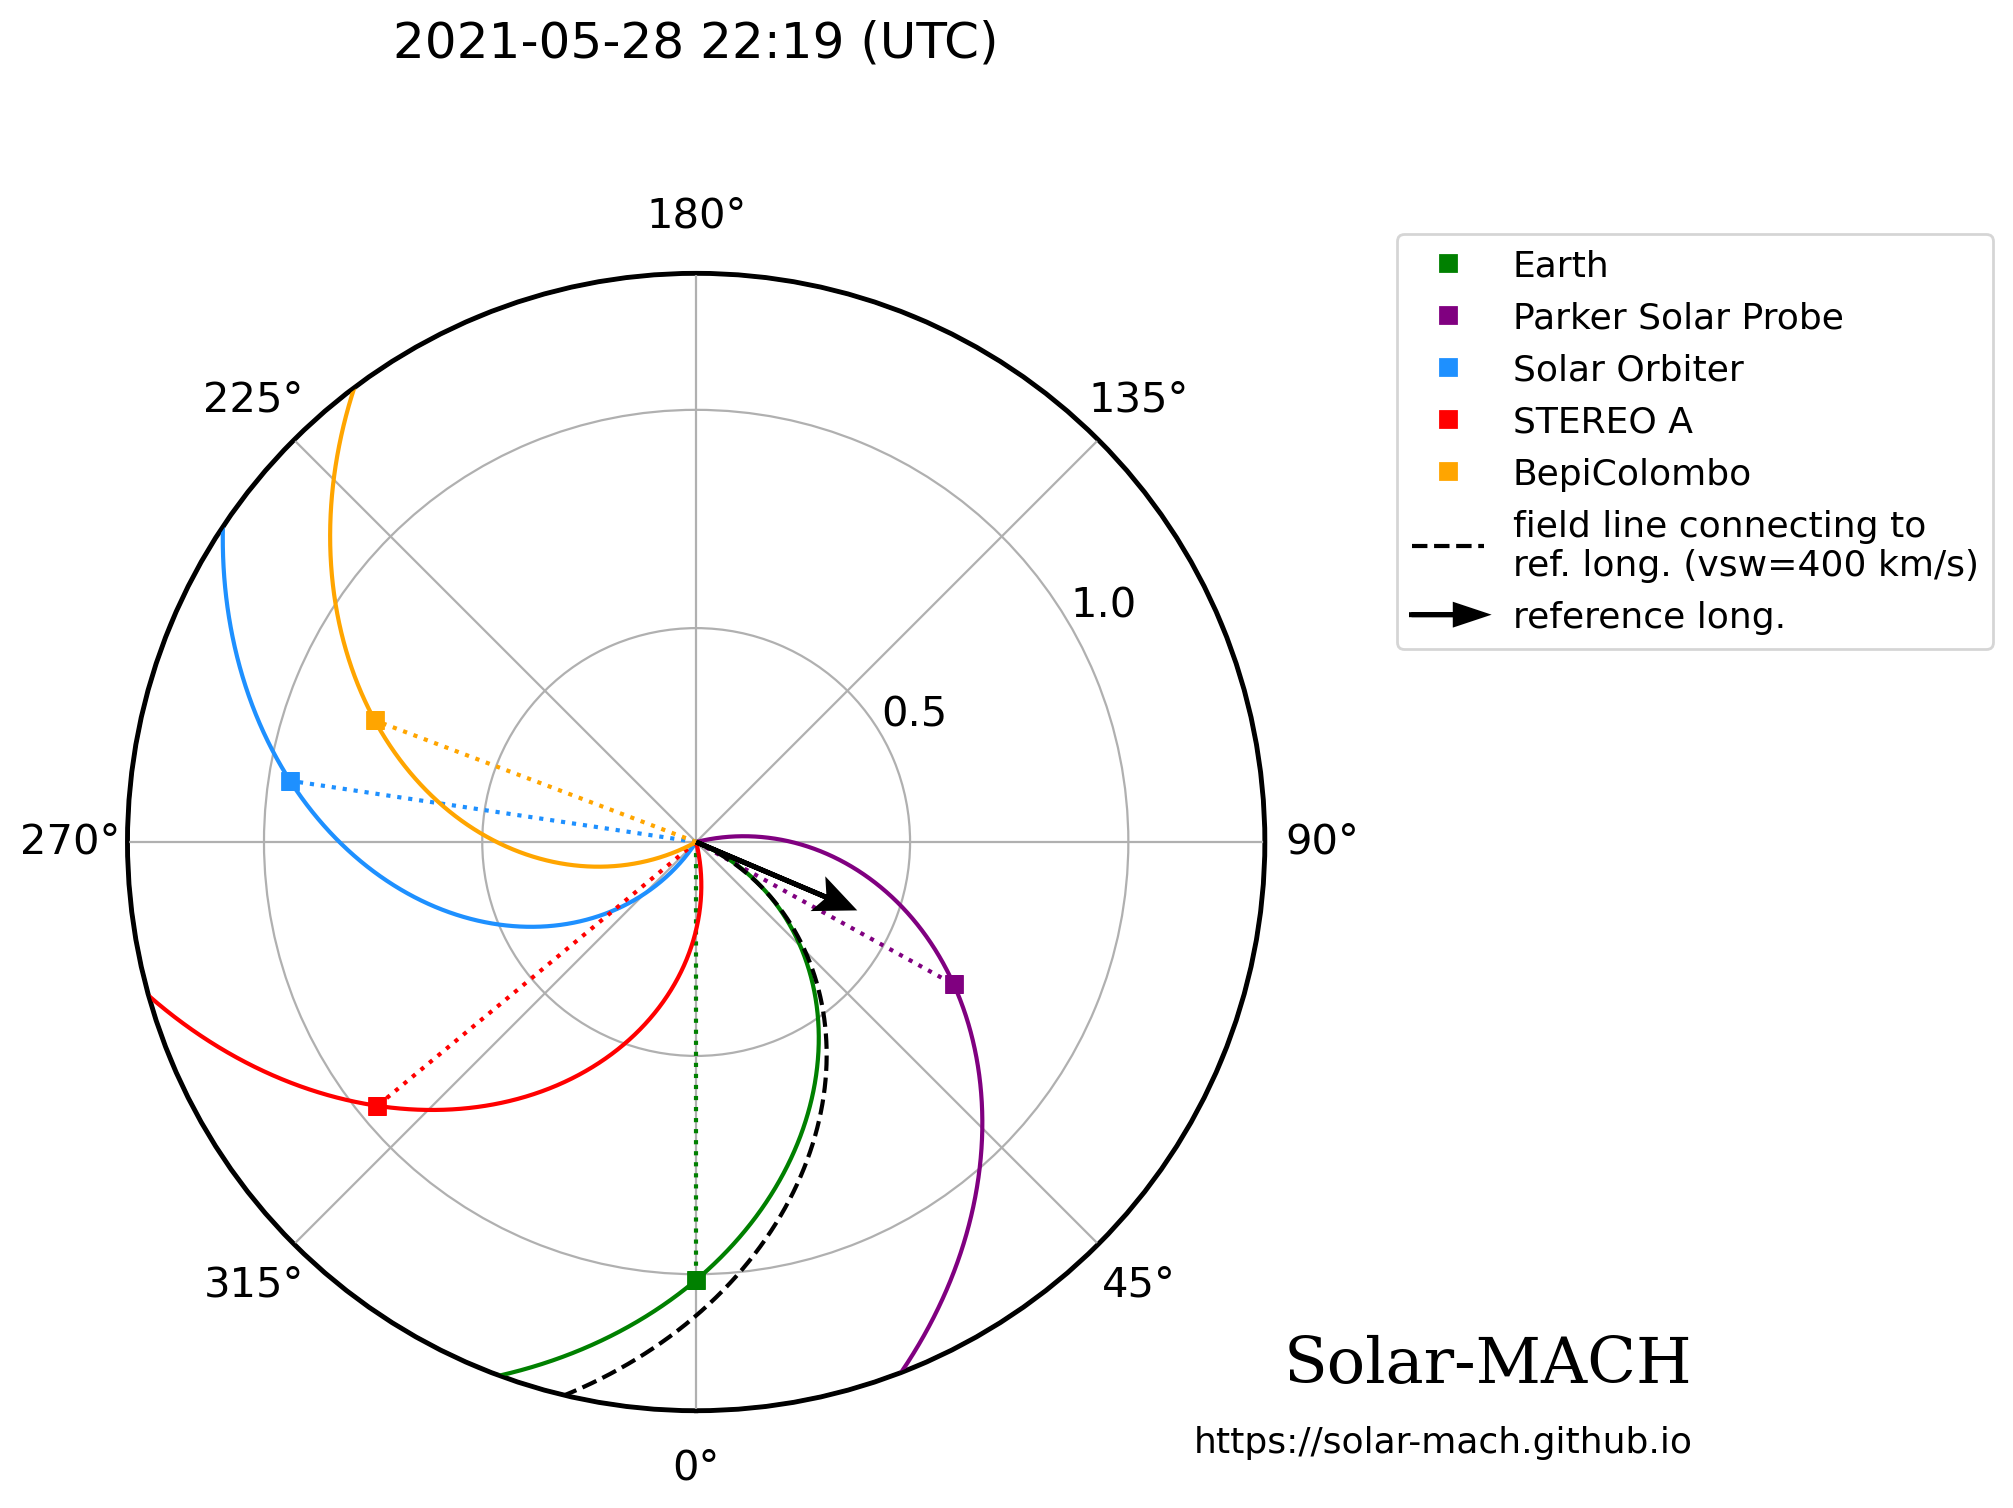

In [13]:
sm1_tab = sm1.coord_table.copy()
sm1_tab.index = sm1_tab['Spacecraft/Body']

# Show the polar plot
sm1.plot(plot_spirals=True, plot_sun_body_line=True, reference_vsw=400,
         transparent=False, numbered_markers=False, long_offset=270,
         return_plot_object=False, outfile=f'SolarMACH_{startdate.strftime("%d%m%Y_%H:%M")}.png')

In [14]:
display(sm1.coord_table)        

,Spacecraft/Body,Stonyhurst longitude (°),Stonyhurst latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Stonyhurst),Longitudinal separation between body and reference_long,Longitudinal separation between body's magnetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,Earth,-0.000002,-1.036852,1.013495,0.000000,0.000000,371.290009,68.201091,-67.000002,1.201091,-20.036852
1,PSP,61.059695,3.108280,0.685340,61.059698,4.145132,394.720642,104.265955,-5.940305,37.265955,-15.891720
2,Solar Orbiter,-98.578091,-0.943589,0.950952,-98.578089,0.093263,361.985870,-32.958184,-165.578091,-99.958184,-19.943589
3,STEREO-A,-50.395401,-6.234611,0.963644,-50.395399,-5.197760,371.396545,13.897957,-117.395401,-53.102043,-25.234611
4,BepiColombo,-110.733366,-3.410311,0.798805,-110.733364,-2.373459,400.000000,-61.011138,-177.733366,-128.011138,-22.410311


## Choose which spacecraft? Keep all 4 options?

In [15]:
# 25-40 MeV Proton channels
proton_channels = {'PSP': {'instrument': 'EpiHi-HET',
                           'channels': [8,9],
                           'intercalibration': 1},
                   'SOHO': {'instrument': 'ERNE-HED',
                            'channels': [3,4],
                            'intercalibration': 1},
                   'STEREO-A': {'instrument': 'HET',
                                'channels': [5,8],
                                'intercalibration': 1},
                   'Solar Orbiter': {'instrument': 'HET',
                                     'channels': [19,24],
                                     'intercalibration': 1}}

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [ ]:
from seppy.loader.psp import psp_isois_load 
psp_df, psp_meta = psp_isois_load(dataset='PSP_ISOIS-EPIHI_L2-HET-RATES60', # 'A_H_Flux_n' 'B_H_Uncertainty_n'
                                  startdate=startdate, enddate=enddate,
                                  path=data_path+'psp/', resample='1min')

# Need to merge A & B sides

from seppy.loader.soho import soho_load 
soho_df, soho_meta = soho_load(dataset='SOHO_ERNE-HED_L2-1MIN', # 'PH_n' 'PHC_n'
                               startdate=startdate, enddate=enddate,
                               path=data_path+'soho/', resample='1min',
                               pos_timestamp='start')
# Need to calculate uncertainties using: unc = (PH_n / sqrt(PHC_n)) * 1.1


from seppy.loader.stereo import stereo_load 
sta_df, sta_meta = stereo_load(instrument='HET', spacecraft='ahead', # 'Proton_Flux_n' 'Proton_Sigma_n'
                               startdate=startdate, enddate=enddate,
                               path=data_path+'stereo/', resample='1min',
                               pos_timestamp='start')

from solo_epd_loader import epd_load 
solo_df, solo_meta = epd_load(sensor='het', level='l2', # [('H_Flux','H_Flux_n')] [('H_Uncertainty','H_Uncertainty_n')]
                              startdate=startdate, enddate=enddate,
                              viewing='omni', autodownload=True,
                              pos_timestamp='start', path=data_path+'solo/')
# Need to resample to 1min


# Build to one df (synced the times) with headers:
# Layer 1: sc-ins
# Layer 2: Flux, Uncertainty, radial position, longitude.

## Instrument intercalibration - not needed

## Radial Scaling

Using the values presented in [Farwa, et al. (2025)](https://www.aanda.org/articles/aa/abs/2025/01/aa50945-24/aa50945-24.html), which used values for 27-37 MeV protons from [Lario et al. (2006)](https://iopscience.iop.org/article/10.1086/508982) (for ~100 keV electrons, [Rodríguez-García et al. (2023)](https://www.aanda.org/10.1051/0004-6361/202244553) is used).

The scaled intensity is calculated as $I_{1 au} = I \cdot R^{a\pm b}$, where $R$ is the radial distance, $I$ is the original intensity, and (for protons specifically) the scaling factors are given as $a \pm b = 1.97 \pm 0.27$.

To calculate the scaled uncertainty, we use the following procedure:
1. Calculate the boundary limits for the intensity calculation (e.g. the result should be $I_{-\alpha}^{+\beta}$).
2. Find the higher boundary limit, as long as it is < the nominal value (e.g. $\beta$).
3. Calculate the scaled uncertainty value: $\Delta I_{1 au} = \Delta I \cdot R^a$.
4. Combine both to get a final uncertainty value: $\Delta I_{1 au, final} = \sqrt{(\beta)^2 + (\Delta I_{1 au})^2}$.

NB: Check that this final uncertainty is still less than the intensity value!